<h1><i>Machine Learning </i></h1>

<h2> Import </h2>

In [119]:
#import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#import data
transaction = pd.read_csv('Case Study - Transaction.csv', sep=';')
customer = pd.read_csv('Case Study - Customer.csv', sep=';')
store = pd.read_csv('Case Study - Store.csv', sep=';')
product = pd.read_csv('Case Study - Product.csv', sep=';')

<h2> Data Cleaning </h2>

In [3]:
#checking the missing values
def missing_values(df):
  total = df.isnull().sum().sort_values(ascending=False)
  percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
  mv = pd.concat([total,percent], axis=1, keys=['Total','Percent'])
  print('Columns with missing values: ')
  print(mv[~(mv['Total']==0)])
  return

<h3> Transaction </h3>

In [4]:
#checking missing values on transaction
missing_values(transaction)

Columns with missing values: 
Empty DataFrame
Columns: [Total, Percent]
Index: []


In [5]:
#checking duplicated on transaction
transaction.duplicated().sum()

0

In [6]:
transaction.sample(1)

TransactionID  CustomerID        Date ProductID  Price  Qty  TotalAmount  \
1754       TR88506         142  06/05/2022        P1   8800    7        61600   

      StoreID  
1754        9

In [7]:
#checking the table info
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [8]:
#changing data type for Date
transaction['Date'] = pd.to_datetime(transaction['Date'], format='%d/%m/%Y')

In [9]:
#transaction table describe
transaction.describe().T

count          mean           std     min      25%      50%  \
CustomerID   5020.0    221.263745    129.672955     1.0    108.0    221.0   
Price        5020.0   9684.800797   4600.708780  3200.0   4200.0   9400.0   
Qty          5020.0      3.644622      1.855295     1.0      2.0      3.0   
TotalAmount  5020.0  32279.482072  19675.462455  7500.0  16000.0  28200.0   
StoreID      5020.0      7.489841      4.028502     1.0      4.0      7.0   

                 75%      max  
CustomerID     332.0    447.0  
Price        15000.0  18000.0  
Qty              5.0     10.0  
TotalAmount  47000.0  88000.0  
StoreID         11.0     14.0

<h3> Customer </h3>

In [10]:
#checking missing values on customer
missing_values(customer)

Columns with missing values: 
                Total   Percent
Marital Status      3  0.671141


In [11]:
#filling the marital status missing values with mode
customer['Marital Status'] = customer['Marital Status'].fillna(customer['Marital Status'].mode()[0])

In [12]:
#rechecking missing values on customer
missing_values(customer)

Columns with missing values: 
Empty DataFrame
Columns: [Total, Percent]
Index: []


In [13]:
#checking duplicated on customer
customer.duplicated().sum()

0

In [14]:
customer.sample(1)

CustomerID  Age  Gender Marital Status Income
256         257   60       0        Married   4,25

In [15]:
#checking the tabel info
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  447 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [16]:
#changing income data type
customer['Income'] = customer['Income'].str.replace(',','.').astype(float)

In [17]:
#customer table describe
customer.describe().T

count        mean         std  min      25%     50%     75%    max
CustomerID  447.0  224.000000  129.182042  1.0  112.500  224.00  335.50  447.0
Age         447.0   39.782998   12.848719  0.0   30.000   39.00   50.50   72.0
Gender      447.0    0.458613    0.498842  0.0    0.000    0.00    1.00    1.0
Income      447.0    8.592103    6.607065  0.0    4.175    7.52   10.81   71.3

In [18]:
c_cat = customer.select_dtypes(exclude='number')
c_cat.describe().T

count unique      top freq
Marital Status   447      2  Married  343

<h3> Store </h3>

In [19]:
#checking missing values on store
missing_values(store)

Columns with missing values: 
Empty DataFrame
Columns: [Total, Percent]
Index: []


In [20]:
#checking duplicated on store
store.duplicated().sum()

0

In [21]:
store.sample(1)

StoreID StoreName GroupStore          Type Latitude  Longitude
13       14  Priangan   Priangan  Modern Trade    -5,45  105,26667

In [22]:
#checking table info
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 804.0+ bytes


In [23]:
#changing Latitude and Longitude data type
store['Latitude'] = store['Latitude'].str.replace(',','.').astype(float)
store['Longitude'] = store['Longitude'].str.replace(',','.').astype(float)

<h3> Product </h3>

In [24]:
#checking missing values on product
missing_values(product)

Columns with missing values: 
Empty DataFrame
Columns: [Total, Percent]
Index: []


In [25]:
#checking duplicated on product
product.duplicated().sum()

0

In [26]:
product.sample(1)

ProductID  Product Name  Price
9       P10  Cheese Stick  15000

In [27]:
#checking table info
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 372.0+ bytes


<h2> Joining Data </h2>

In [28]:
#join data

#joining transaction with customer
merge1 = pd.merge(transaction, customer, on='CustomerID', how='inner')

#adding product data
merge2 = pd.merge(merge1, product, on='ProductID', how='inner')

#adding store data
df = pd.merge(merge2, store, on='StoreID', how='inner')

df.sample(5)

TransactionID  CustomerID       Date ProductID  Price_x  Qty  \
973        TR22673         403 2022-09-13        P2     3200    6   
3944       TR16147         111 2022-09-16        P4    12000    2   
2211       TR38922         215 2022-09-24        P8    16000    3   
4183       TR67772         256 2022-05-26        P2     3200    6   
2431       TR25746         223 2022-08-24       P10    15000    5   

      TotalAmount  StoreID  Age  Gender Marital Status  Income   Product Name  \
973         19200       10   30       0        Married    4.06  Ginger Candy    
3944        24000        8   59       1        Married    4.59    Potato Chip   
2211        48000        9   25       0         Single    5.54            Oat   
4183        19200        6   56       0        Married    7.09  Ginger Candy    
2431        75000        9   62       1         Single    5.35   Cheese Stick   

      Price_y      StoreName    GroupStore           Type  Latitude  \
973      3200   Harapan Baru  Harapan Baru  General Trade  3.597031   
3944    12000  Sinar Harapan  Harapan Baru  General Trade  5.548290   
2211    16000         Lingga        Lingga   Modern Trade -3.654703   
4183     3200         Lingga        Lingga   Modern Trade -5.135399   
2431    15000         Lingga        Lingga   Modern Trade -3.654703   

       Longitude  
973    98.678513  
3944   95.323753  
2211  128.190643  
4183  119.423790  
2431  128.190643

<h2> Cleaning Data </h2>

In [29]:
#rename price column
df.rename(columns={'Price_x':'Price'}, inplace=True)

In [30]:
#drop duplicated column
df.drop('Price_y', axis=1, inplace=True)

In [31]:
#re-checking the missing values
missing_values(df)

Columns with missing values: 
Empty DataFrame
Columns: [Total, Percent]
Index: []


In [32]:
df.shape

(5020, 18)

In [33]:
#filling the marital status missing values with mode
df['Marital Status'] = df['Marital Status'].fillna(df['Marital Status'].mode()[0])

In [34]:
#re-checking missing values
missing_values(df)

Columns with missing values: 
Empty DataFrame
Columns: [Total, Percent]
Index: []


In [35]:
#re-checking the duplicated row(s)
df.duplicated().sum()

0

In [36]:
#re-checking table info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   5020 non-null   object        
 1   CustomerID      5020 non-null   int64         
 2   Date            5020 non-null   datetime64[ns]
 3   ProductID       5020 non-null   object        
 4   Price           5020 non-null   int64         
 5   Qty             5020 non-null   int64         
 6   TotalAmount     5020 non-null   int64         
 7   StoreID         5020 non-null   int64         
 8   Age             5020 non-null   int64         
 9   Gender          5020 non-null   int64         
 10  Marital Status  5020 non-null   object        
 11  Income          5020 non-null   float64       
 12  Product Name    5020 non-null   object        
 13  StoreName       5020 non-null   object        
 14  GroupStore      5020 non-null   object        
 15  Type

In [37]:
#Deleting unnecessary columns
delete_columns = ['TransactionID','CustomerID','ProductID','StoreID']
df.drop(delete_columns, axis=1, inplace=True)
df.sample(2)

Date  Price  Qty  TotalAmount  Age  Gender Marital Status  Income  \
1348 2022-05-26  15000    3        45000   19       1         Single    0.00   
3693 2022-12-13   4200    5        21000   33       0        Married    7.44   

      Product Name      StoreName    GroupStore           Type  Latitude  \
1348  Cheese Stick  Prima Tendean         Prima   Modern Trade  -6.20000   
3693      Thai Tea  Sinar Harapan  Harapan Baru  General Trade   5.54829   

       Longitude  
1348  106.816666  
3693   95.323753

In [38]:
print('Min date from dataset: %s' % df['Date'].min().date())
print('Max date from dataset: %s' % df['Date'].max().date())

Min date from dataset: 2022-01-01
Max date from dataset: 2022-12-31


<h2> Outliers </h2>

In [39]:
#showing data describe only the mean and median, min and max
df.describe().loc[['mean', '50%','min','max']].T

mean           50%          min           max
Price         9684.800797   9400.000000  3200.000000  18000.000000
Qty              3.644622      3.000000     1.000000     10.000000
TotalAmount  32279.482072  28200.000000  7500.000000  88000.000000
Age             40.003586     39.000000     0.000000     72.000000
Gender           0.452988      0.000000     0.000000      1.000000
Income           8.623713      7.720000     0.000000     71.300000
Latitude        -2.942236     -5.135399    -7.797068      5.548290
Longitude      109.600789    110.370529    95.323753    128.190643

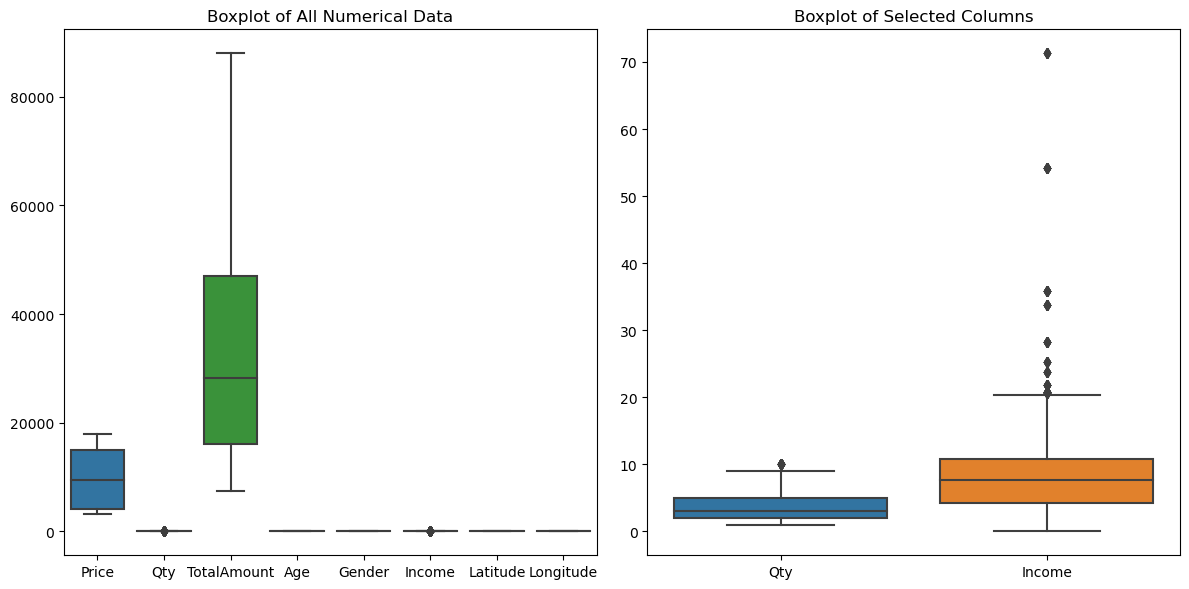

In [40]:
#get to know the outliers with the box plot visualization
boxplot_data = ['Qty','Income']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12, 6])

sns.boxplot(data=df, ax=ax1)
ax1.set_title("Boxplot of All Numerical Data")

sns.boxplot(data=df[boxplot_data], ax=ax2)
ax2.set_title("Boxplot of Selected Columns")

#make sure the plot not overlap
plt.tight_layout()

<Axes: xlabel='Age', ylabel='Count'>

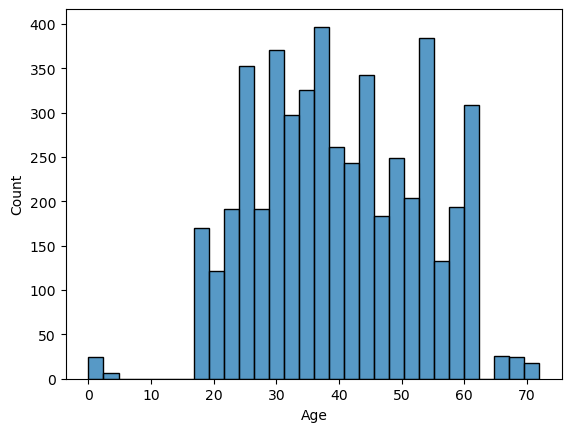

In [41]:
#showing the distribution of the Age
#there's no outliers in Age, but from the product, it something impossible consumed by under age child.
sns.histplot(df, x='Age')

<Axes: xlabel='Age', ylabel='Count'>

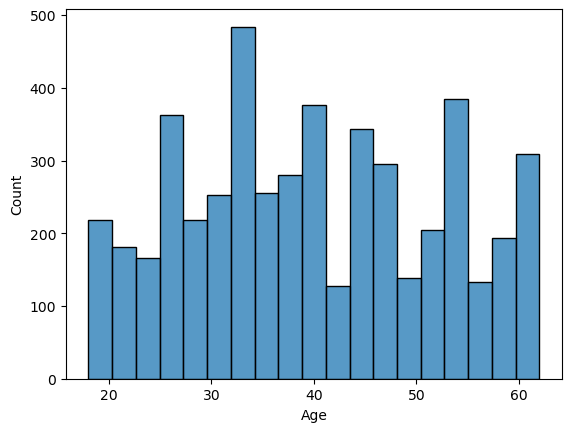

In [61]:
#getting data with condition 18<= Age >= 62
df2 = df.loc[(df['Age'] >= 18) & (df['Age'] <= 62)]
sns.histplot(df2, x='Age')

<Axes: xlabel='Qty'>

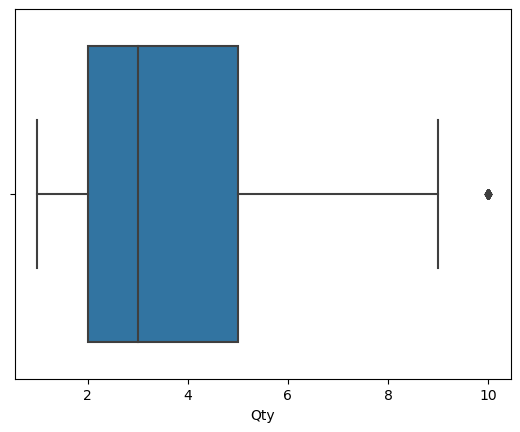

In [62]:
#quantity in outlier
sns.boxplot(df2, x='Qty')

<Axes: xlabel='Qty'>

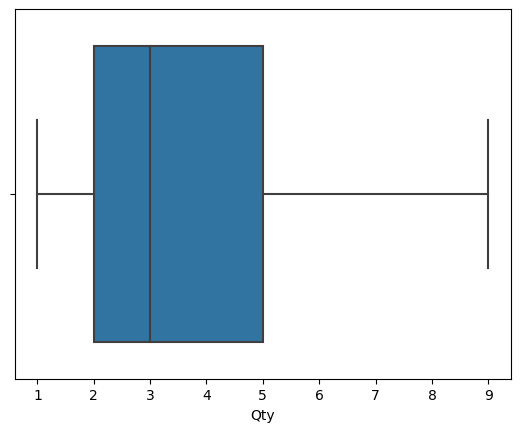

In [65]:
#remove rows with quantity >9
df2 = df2.loc[(df2['Qty'] <= 9)]
sns.boxplot(df2,x='Qty')

<Axes: xlabel='Income'>

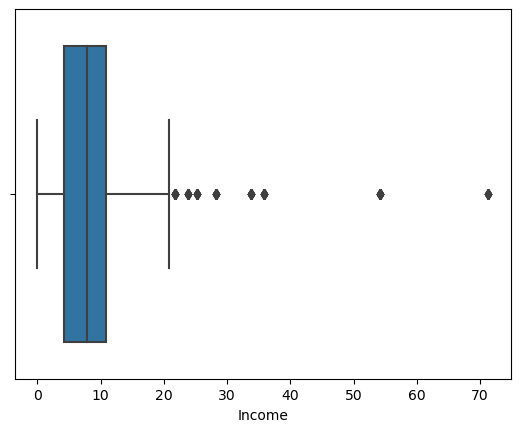

In [66]:
sns.boxplot(df2, x='Income')

<Axes: xlabel='Income'>

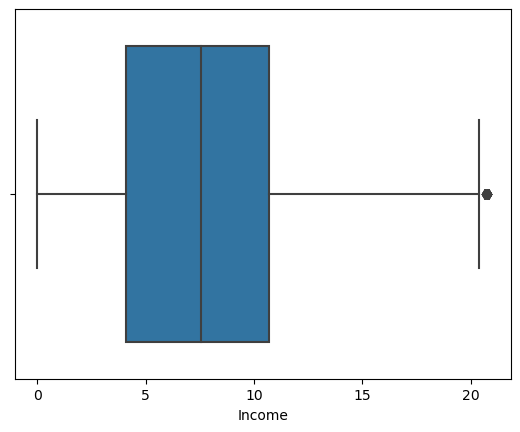

In [73]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df2 = df2.loc[(df2['Income'] >= lower_bound) & (df2['Income'] <= upper_bound)]

sns.boxplot(df2,x='Income')

<h1> Time Series </h1>
<h3> <i>Predicting the daily total quantity of the product sold</i> </h3>

<h2> Visualization </h2>

In [39]:
!pip install chart_studio

Active code page: 1252


In [40]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

In [41]:
daily_sales = df.groupby(['Date'],as_index=False).agg({'TotalAmount':'sum'})
daily_sales_plot = go.Scatter(x=daily_sales['Date'], y=daily_sales['TotalAmount'])
layout = go.Layout(title='Daily Sales in 2022', xaxis=dict(title='Date'), yaxis=dict(title='Sales'))
fig = go.Figure(data=[daily_sales_plot], layout=layout)
iplot(fig)

In [42]:
daily_product = df.groupby(['Product Name','Date'], as_index=False).agg({'TotalAmount':'sum'})
product_sales = []
for product in daily_product['Product Name'].unique():
    current_product_sales = daily_product[(daily_product['Product Name']==product)]
    product_sales.append(go.Scatter(x=current_product_sales['Date'], y=current_product_sales['TotalAmount'], name=('Product %s' % product)))

layout = go.Layout(title='Product Daily Sales', xaxis=dict(title='Date'), yaxis=dict(title='Product Sales'))
fig = go.Figure(data=product_sales, layout=layout)
iplot(fig)

In [43]:
daily_store = df.groupby(['Date','StoreName'], as_index=False).agg({'TotalAmount':'sum'})
store_sales = []
for store in daily_store['StoreName'].unique():
    current_store_sales = daily_store[(daily_store['StoreName'])==store]
    store_sales.append(go.Scatter(x=current_store_sales['Date'], y=current_store_sales['TotalAmount'], name=('Store %s' % store)))

layout = go.Layout(title='Store Daily Sales', xaxis=dict(title='Date'), yaxis=dict(title='Store Sales'))
fig = go.Figure(data=store_sales, layout=layout)
iplot(fig)

 <h2> Creating Dataset for Modeling </h2>

In [44]:
df.sample(2)

Date  Price  Qty  TotalAmount  Age  Gender Marital Status  Income  \
1268 2022-07-20   9400    6        56400   35       1        Married    9.56   
3603 2022-08-01  12000    3        36000   51       0        Married   16.42   

      Product Name         StoreName GroupStore          Type  Latitude  \
1268  Coffee Candy     Prima Tendean      Prima  Modern Trade -6.200000   
3603   Potato Chip  Prima Kelapa Dua      Prima  Modern Trade -6.914864   

       Longitude  
1268  106.816666  
3603  107.608238

In [45]:
#first we sort the Date to make it clear that we have ascending order Date
#then we make grouping and aggregation by Date and sum the quantity
ts = df.sort_values('Date').groupby('Date', as_index=False).agg({'Qty':'sum'})
ts.sample(2)

Date  Qty
235 2022-08-24   52
362 2022-12-29   42

<h2> Time Series Preparing </h2>

<h3> Time series plot </h3>

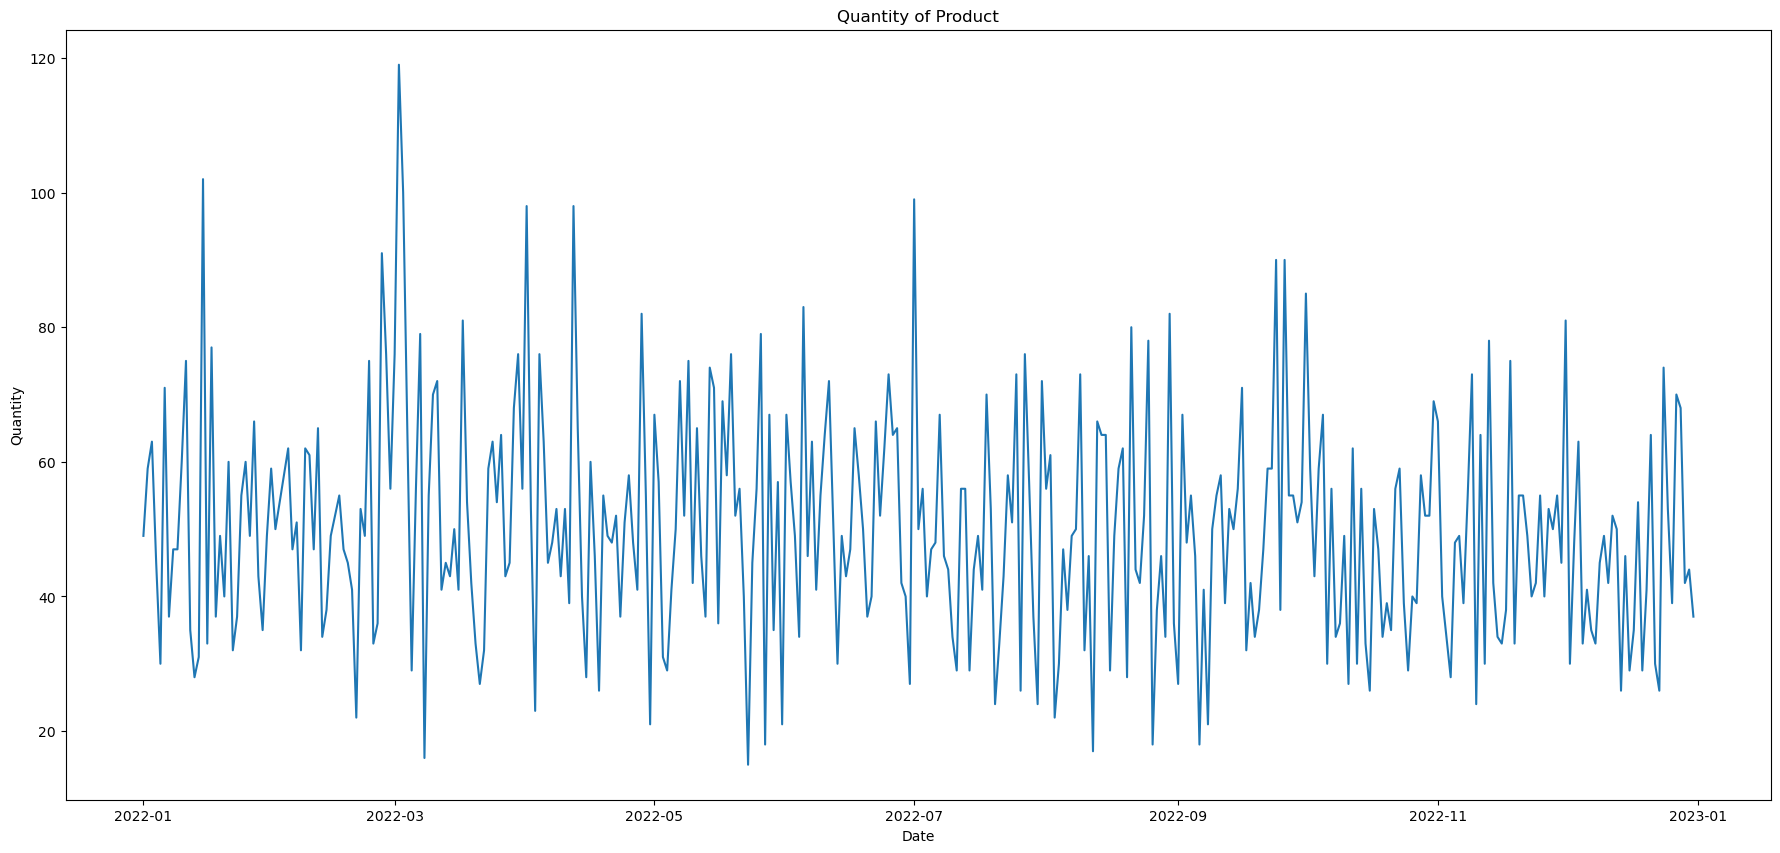

In [46]:
#time series plot

plt.figure(figsize=(22,10))
plt.plot(ts['Date'],ts['Qty'])
plt.title('Quantity of Product')
plt.xlabel('Date')
plt.ylabel('Quantity')

timeseries = ts.loc[:, ['Date','Qty']]
timeseries.index = timeseries['Date']
timeseries2 = timeseries.drop('Date', axis=1)

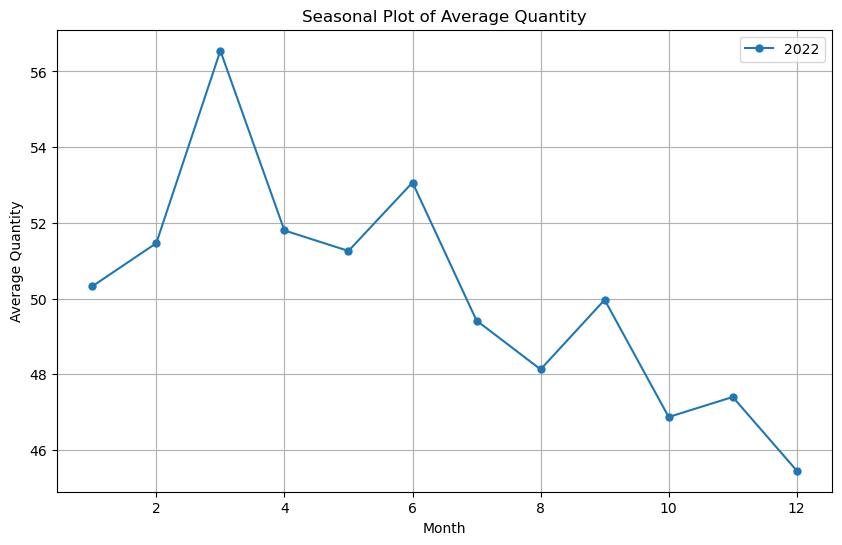

In [47]:
#seasonal plot
sp = ts.copy()
sp['Date'] = pd.to_datetime(sp['Date'])

sp['Year'] = sp['Date'].dt.year
sp['Month'] = sp['Date'].dt.month

average_quantity = sp.groupby(['Year', 'Month'], as_index=False).agg({'Qty':'mean'})

pivot_data = average_quantity.pivot(index='Month', columns='Year', values='Qty')

plt.figure(figsize=(10, 6))
plt.plot(pivot_data, marker='o', markersize=5)
plt.xlabel('Month')
plt.ylabel('Average Quantity')
plt.title('Seasonal Plot of Average Quantity')
plt.legend(pivot_data.columns)
plt.grid(True)
plt.show()


<h2> Stationary Check</h2>

<h3>Rolling Statistic</h3>

In [48]:
ts.sample(2)

Date  Qty
13  2022-01-14   31
112 2022-04-23   37

In [49]:
data = ts.copy()
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index(['Date'])
data.sample(2)

Qty
Date           
2022-02-10   47
2022-01-10   60

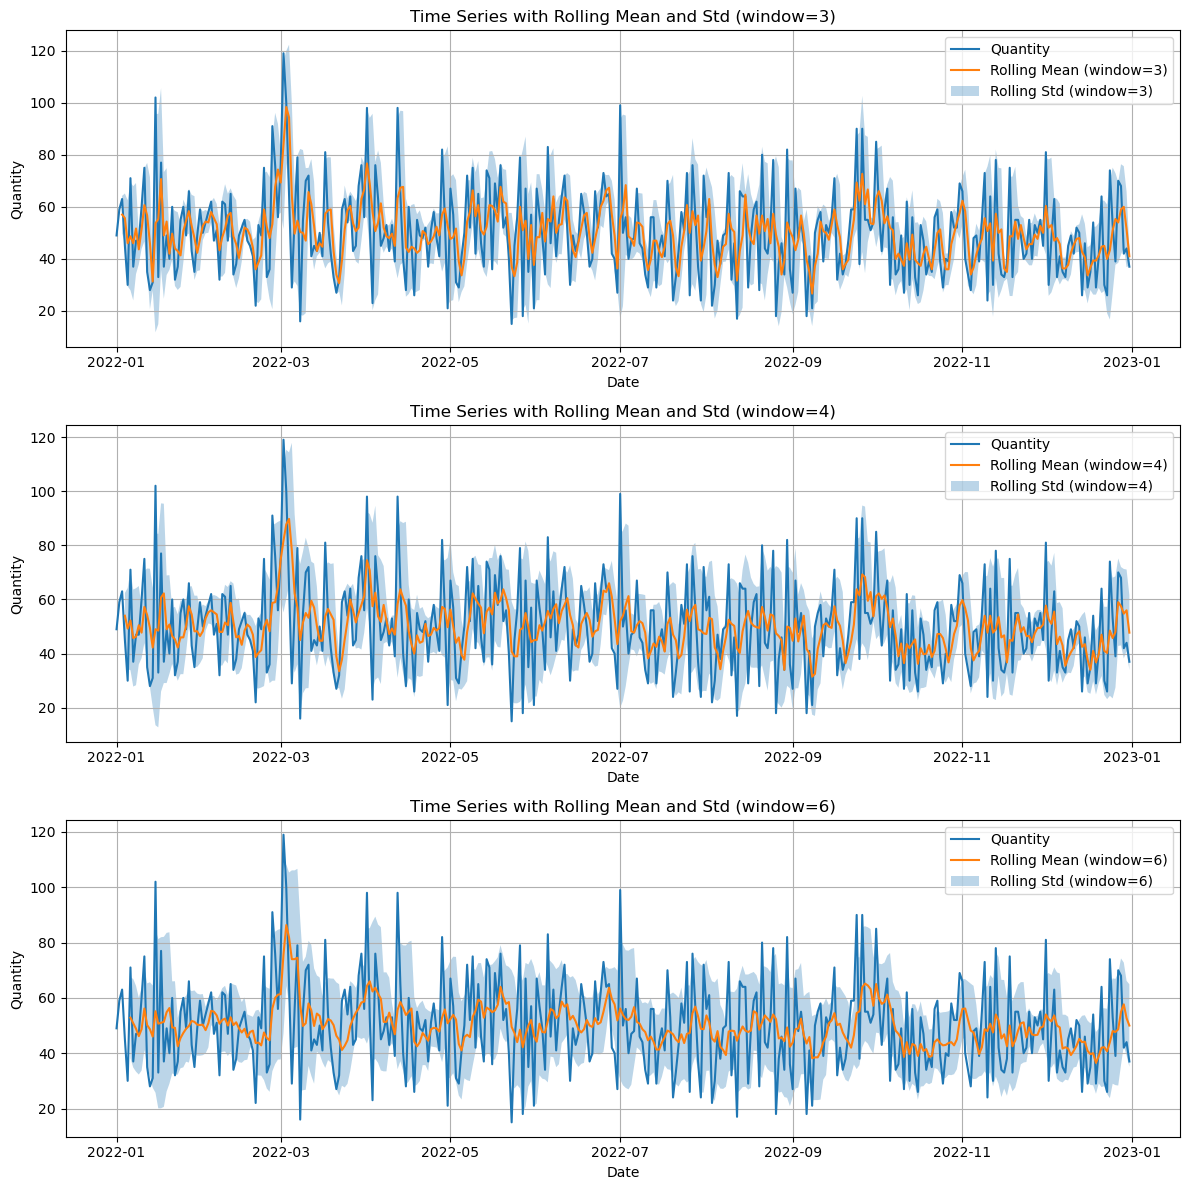

In [50]:
#calculating rolling mean and standard deviation with different values of window
rolling_mean_3 = data['Qty'].rolling(window=3).mean()
rolling_mean_4 = data['Qty'].rolling(window=4).mean()
rolling_mean_6 = data['Qty'].rolling(window=6).mean()

rolling_std_3 = data['Qty'].rolling(window=3).std()
rolling_std_4 = data['Qty'].rolling(window=4).std()
rolling_std_6 = data['Qty'].rolling(window=6).std()

#make the visualization
plt.figure(figsize=(12, 12))

#subplot 1: window=3
plt.subplot(311)
plt.plot(data['Qty'], label='Quantity')
plt.plot(rolling_mean_3, label='Rolling Mean (window=3)')
plt.fill_between(data.index, rolling_mean_3 - rolling_std_3, rolling_mean_3 + rolling_std_3,
                 alpha=0.3, label='Rolling Std (window=3)')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Time Series with Rolling Mean and Std (window=3)')
plt.legend()
plt.grid(True)

#subplot 2: window=4
plt.subplot(312)
plt.plot(data['Qty'], label='Quantity')
plt.plot(rolling_mean_4, label='Rolling Mean (window=4)')
plt.fill_between(data.index, rolling_mean_4 - rolling_std_4, rolling_mean_4 + rolling_std_4,
                 alpha=0.3, label='Rolling Std (window=4)')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Time Series with Rolling Mean and Std (window=4)')
plt.legend()
plt.grid(True)

#subplot 3: window=6
plt.subplot(313)
plt.plot(data['Qty'], label='Quantity')
plt.plot(rolling_mean_6, label='Rolling Mean (window=6)')
plt.fill_between(data.index, rolling_mean_6 - rolling_std_6, rolling_mean_6 + rolling_std_6,
                 alpha=0.3, label='Rolling Std (window=6)')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Time Series with Rolling Mean and Std (window=6)')
plt.legend()
plt.grid(True)

plt.tight_layout()  # To adjust the spacing between subplots
plt.show()


Our data is stationer

<h3> Augmented Dickey-Fuller (ADF) </h3>

In [51]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller

In [52]:
adf = adfuller(data['Qty'], autolag='AIC')

adf_output = pd.Series(adf[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])

for key,value in adf[4].items():
    adf_output['Critical Value (%s)'%key] = value

print('ADF test: ')
print(adf_output)

ADF test: 
Test Statistic          -19.448086
p-value                   0.000000
Lags Used                 0.000000
No. of Obs              364.000000
Critical Value (1%)      -3.448443
Critical Value (5%)      -2.869513
Critical Value (10%)     -2.571018
dtype: float64


<ul>ADF test interprete:
    <li>Test Statistic:
        <p>-19.448086 is highly negative value and indicates strong evidence to against the null hypothesis of non-stationarity</p></li>
    <li>p-value:
        <p>0.000000 represents strong evidence against the null hypothesis</p></li>
    <li>Lag Used:
        <p>0.000000 indicates no lags were used</p></li>
</ul>
<b>Summary:</b><br>
ADF test provides strong evidence that this data is stationary which is a desirable property for time series modeling and forecasting

<h2> Decomposition and Autocorrelation Function </h2>

<h3> Decomposition </h3>

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose

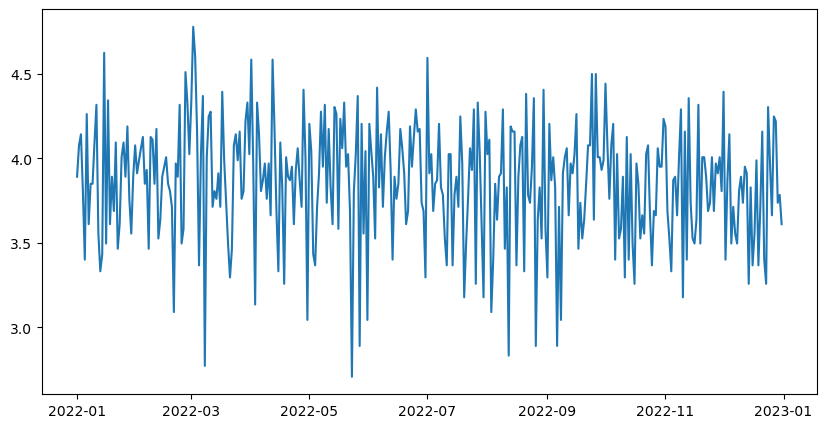

In [54]:
plt.figure(figsize=(10,5))
data_log=np.log(data) 
plt.plot(data_log)

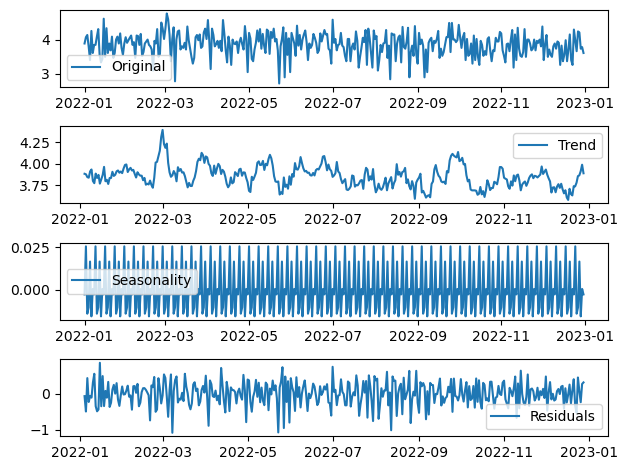

In [55]:
decomposition = seasonal_decompose(data_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

#visualization with multiplot
#subplot 1: original data
plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
#subplot 2: trend
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
#subplot 3: seasonal
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
#subplot 4: residual
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

<h3> Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)</h3>

In [56]:
from statsmodels.tsa.stattools import acf, pacf 

In [57]:
data_shift = data_log-data_log.shift()

#drop NA values from shifting
data_shift = data_shift.dropna()

Text(0.5, 1.0, 'Partial Autocorrelation Function / PACF')

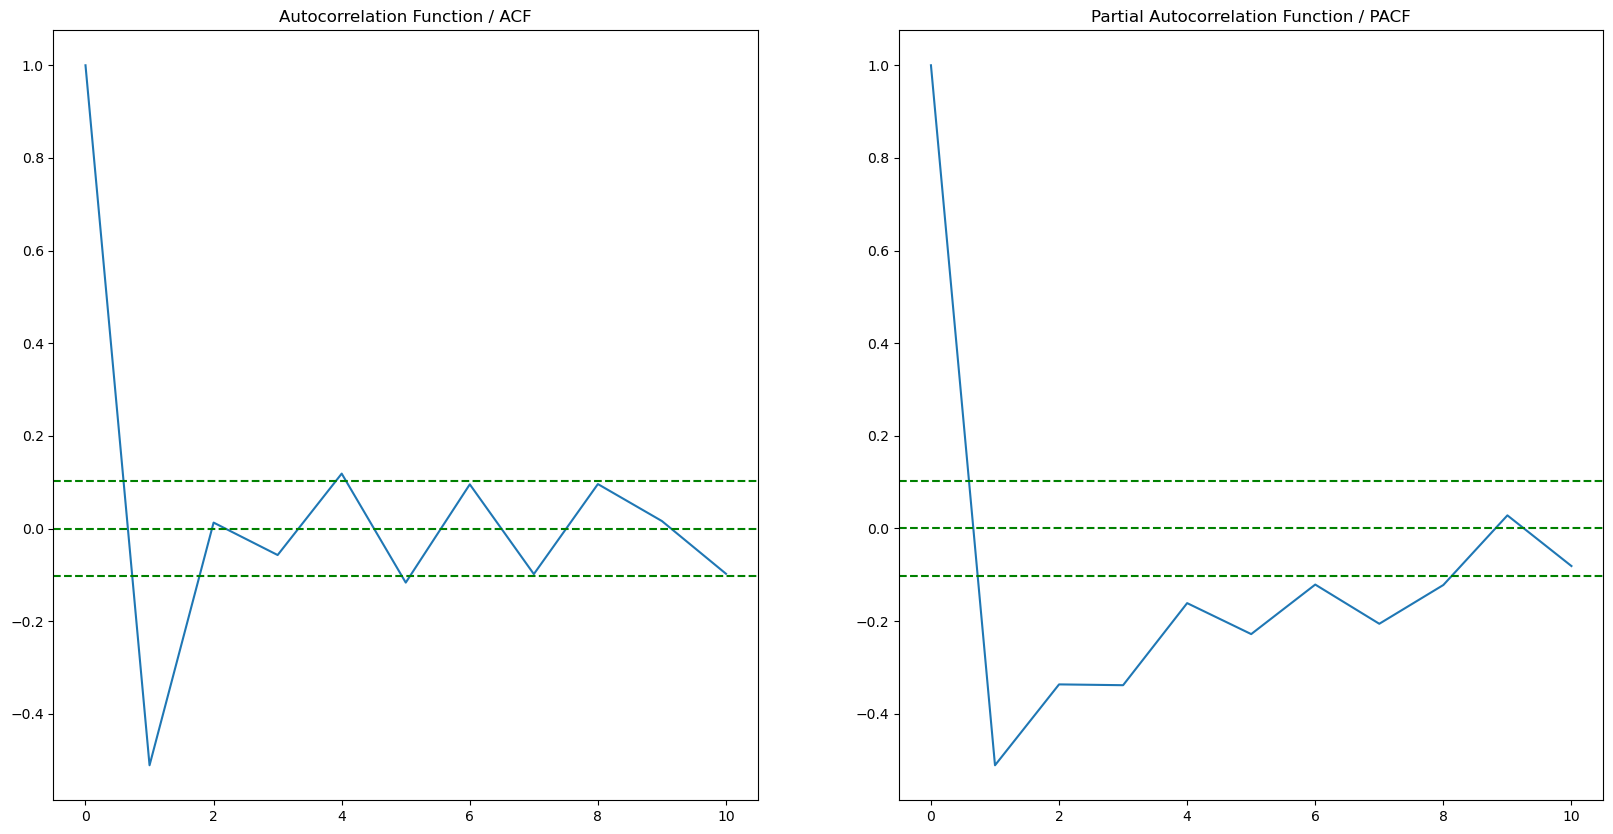

In [111]:
lag_acf = acf(data_shift, nlags=10)
lag_pacf = pacf(data_shift, nlags=10, method='ols')

#ACF plot
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = -0.16
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = 0.16
plt.title('Autocorrelation Function / ACF')

#PACF plot
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = -0.16
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = 0.16
plt.title('Partial Autocorrelation Function / PACF')

<li>p = 9</li>
<li>q = 2</li>

<h2> Splitting Dataset </h2>

In [112]:
train = data[:int(len(data)*0.80)]
test = data[int(len(data)*0.80):]

In [113]:
print('train shape: ',train.shape)
print('test shape: ',test.shape)

train shape:  (292, 1)
test shape:  (73, 1)


<h2> ARIMA </h2>

<b> ARIMA: Autoregressive Integrated Moving Average Model </b>
<p>Forecasting algorithm based on the information of the past values, lags and the lagged forecast errors. Any <i>non-seasonal</i> time series that exhibit patterns and is not a random white noise could use this models.
<ul>ARIMA 3 parameters:
    <li><b>p</b> is the order of the AR term
    <p>p or AR (autoregression) is a regression model that utiliza the dependent relationship between current observation and observation over a previous period.<br>
        We identify AR with PACF
    </li>
    <li><b>d</b> is the number of differencing required to make the time series stationary
    <p>d or I (integration) uses differencing of observations in order to make the time series stationary. If the time series is already stationary, d=0</li>
    <li><b>q</b> is the order of MA term
    <p>q or MA (moving average) is a model that uses the dependency between an observation and residual error from MA model applied to lagged observations</li>

In [114]:
from statsmodels.tsa.arima.model import ARIMA

In [133]:
#AR model
model = ARIMA(train['Qty'], order=(9,0,0))
ar_model = model.fit()
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    Qty   No. Observations:                  292
Model:                 ARIMA(9, 0, 0)   Log Likelihood               -1240.903
Date:                Wed, 26 Jul 2023   AIC                           2503.806
Time:                        12:44:20   BIC                           2544.250
Sample:                    01-01-2022   HQIC                          2520.006
                         - 10-19-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.9712      1.308     38.976      0.000      48.408      53.534
ar.L1         -0.0105      0.054     -0.195      0.845      -0.116       0.095
ar.L2         -0.0262      0.060     -0.433      0.665      -0.145       0.092
ar.L3         -0.0405      0.061     -0.663      0.507      -0.160       0.079
ar.L4          0.1043      0.057      1.822      0.068      -0.008       0.216
ar.L5         -0.0226      0.058     -0.390      0.697      -0.136       0.091
ar.L6          0.0708      0.059      1.209      0.227      -0.044       0.186
ar.L7          0.0059      0.062      0.094      0.925      -0.116       0.128
ar.L8          0.0912      0.067      1.354      0.176      -0.041       0.223
ar.L9          0.0035      0.063      0.056      0.955      -0.119       0.126
sigma2       287.4107     23.837     12.057      0.000     240.690     334.131
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                18.55
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                             0.51
Prob(H) (two-sided):                  0.41   Kurtosis:                         3.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

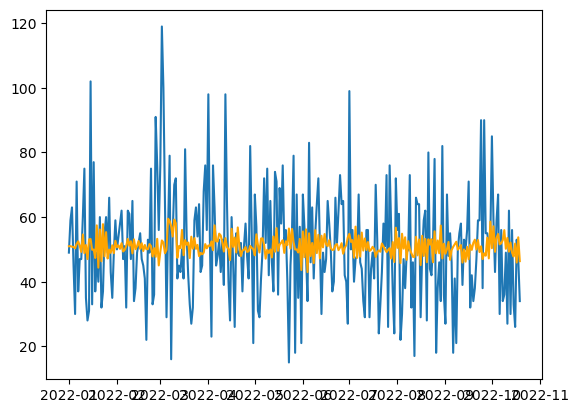

In [134]:
plt.plot(train)
plt.plot(ar_model.fittedvalues, color='orange')

In [135]:
#MA model
model = ARIMA(train['Qty'], order=(0,0,2))
ma_model = model.fit()
ma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    Qty   No. Observations:                  292
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1245.186
Date:                Wed, 26 Jul 2023   AIC                           2498.372
Time:                        12:44:27   BIC                           2513.079
Sample:                    01-01-2022   HQIC                          2504.263
                         - 10-19-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.0216      1.046     48.801      0.000      48.972      53.071
ma.L1         -0.0208      0.051     -0.410      0.682      -0.120       0.079
ma.L2         -0.0106      0.060     -0.177      0.859      -0.128       0.107
sigma2       296.1240     22.737     13.024      0.000     251.560     340.688
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                20.60
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             0.55
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

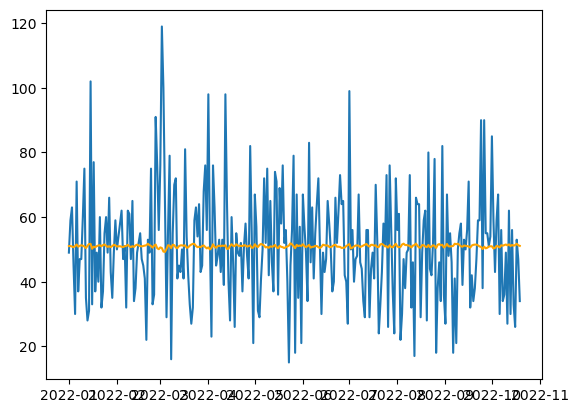

In [136]:
plt.plot(train)
plt.plot(ma_model.fittedvalues, color='orange')

In [146]:
#arima model
model = ARIMA(train['Qty'], order=(9,0,2))
model_result = model.fit()
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    Qty   No. Observations:                  292
Model:                ARIMA(10, 0, 3)   Log Likelihood               -1236.043
Date:                Wed, 26 Jul 2023   AIC                           2502.085
Time:                        14:03:06   BIC                           2557.237
Sample:                    01-01-2022   HQIC                          2524.177
                         - 10-19-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.1059      0.888     57.582      0.000      49.366      52.845
ar.L1          0.6373      0.289      2.207      0.027       0.071       1.203
ar.L2         -0.4650      0.306     -1.519      0.129      -1.065       0.135
ar.L3          0.4964      0.242      2.050      0.040       0.022       0.971
ar.L4          0.1334      0.087      1.537      0.124      -0.037       0.304
ar.L5         -0.1019      0.091     -1.123      0.261      -0.280       0.076
ar.L6          0.1692      0.100      1.696      0.090      -0.026       0.365
ar.L7         -0.1172      0.101     -1.160      0.246      -0.315       0.081
ar.L8          0.1257      0.090      1.401      0.161      -0.050       0.302
ar.L9         -0.0986      0.098     -1.006      0.315      -0.291       0.094
ar.L10        -0.1075      0.074     -1.448      0.148      -0.253       0.038
ma.L1         -0.6566      0.290     -2.264      0.024      -1.225      -0.088
ma.L2          0.4699      0.300      1.565      0.118      -0.119       1.058
ma.L3         -0.5460      0.235     -2.326      0.020      -1.006      -0.086
sigma2       277.6292     22.750     12.204      0.000     233.041     322.218
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.13
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                             0.42
Prob(H) (two-sided):                  0.59   Kurtosis:                         3.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

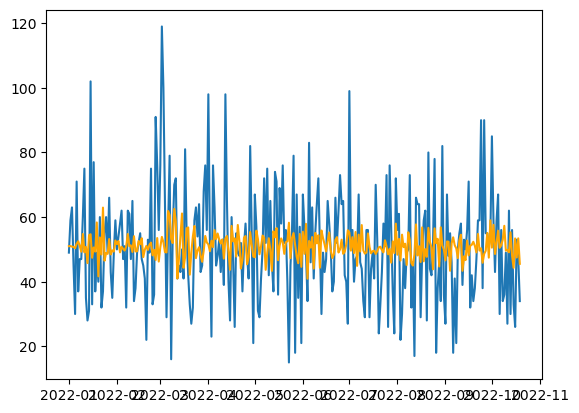

In [140]:
plt.plot(train)
plt.plot(model_result.fittedvalues, color='orange')

<h1> Clustering </h1>

<h2> Split Dataset into Train, Test and Validation </h2>

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
train, valid, test = np.split(ts.sample(frac=1),[int(0.6*len(ts)),int(0.8*len(ts))])

In [51]:
print('train shape: ',train.shape)
print('validation shape: ',valid.shape)
print('test shape: ',test.shape)

train shape:  (219, 2)
validation shape:  (73, 2)
test shape:  (73, 2)
